Populating the interactive namespace from numpy and matplotlib
9950
199
199


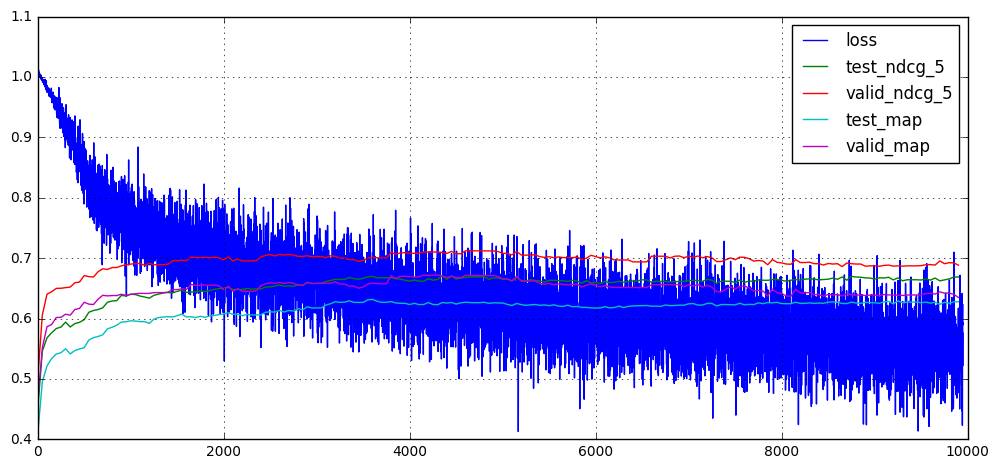

In [86]:
import os

import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
%pylab inline

def load_log(log_file):
    loss = []
    epoch = []
    lr = []
    test_ndcg_5 = []
    test_map = []
    valid_ndcg_5 = []
    valid_map = []
    with open(log_file, 'r') as f:
        for line in f:
            line = line.strip()
            if "Epoch" in line:
                items = line.split()
                epoch.append(items[6].strip())
                loss.append(float(items[13].strip()[:-1]))
                lr.append(items[-1].strip())
            if "[Eval:test]" in line:
                items = line.split()
                test_ndcg_5.append(float(items[-1].split("=")[-1]))
                test_map.append(float(items[-2].split("=")[-1]))
            if "[Eval:valid]" in line:
                items = line.split()
                valid_ndcg_5.append(float(items[-1].split("=")[-1]))
                valid_map.append(float(items[-2].split("=")[-1]))

            
    return loss, epoch, lr, test_ndcg_5, valid_ndcg_5, test_map, valid_map
            
loss, epoch, lr, test_ndcg_5, valid_ndcg_5, test_map, valid_map = load_log("/tmp/matchzoo/knrm-sgd-1e4/log")
# print(loss)
# print(epoch) # useless
# print(lr) # 

print(len(loss))
print(len(valid_ndcg_5))
print(len(test_ndcg_5))

# fig, ax = plt.subplots(figsize=(12, 5))

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(loss,label='loss')
plt.plot(range(0, len(test_ndcg_5)*50, 50), test_ndcg_5, label='test_ndcg_5')
plt.plot(range(0, len(valid_ndcg_5)*50, 50), valid_ndcg_5,label='valid_ndcg_5')
plt.plot(range(0, len(test_map)*50, 50), test_map,label='test_map')
plt.plot(range(0, len(valid_map)*50, 50), valid_map,label='valid_map')


plt.grid(True)
plt.legend()

In [84]:
"[07-24-2018 14:05:45]	[Eval:test] Iter:0	ndcg@3=0.611744	map=0.622852	ndcg@5=0.663662".split()[-2].split("=")[-1]

'map=0.622852'